In [1]:
from __future__ import print_function, division
#import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json

#s = json.load( open(os.getenv('PUI2016')+'/fbb_matplotlibrc.json') )
#pl.rcParams.update(s)
if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline


#If we have data on the energy consumed by a building how well does that relate to the number of 
#units in the building?

Populating the interactive namespace from numpy and matplotlib


In [2]:
### Come back here and write a download data command ... for now click downloaded 



#nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
nrg = pd.read_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

#bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")
bsize = pd.read_csv(os.getenv("PUIDATA") + "/BORO_zip_files_csv/MN.csv")

## NOTE: due to geopandas package incompatability, using .csv file found in /BORO_zip_files_csv/MS.csv

#df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

/Users/seastar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nrg.columns

Index([u'Record Number', u'BBL', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Council District',
       u'Census Tract', u'BI

In [4]:
bsize.columns

Index([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'SanitBoro', u'SanitDistrict', u'SanitSub', u'Address',
       u'ZoneDist1', u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1',
       u'Overlay2', u'SPDist1', u'SPDist2', u'SPDist3', u'LtdHeight',
       u'SplitZone', u'BldgClass', u'LandUse', u'Easements', u'OwnerType',
       u'OwnerName', u'LotArea', u'BldgArea', u'ComArea', u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'AreaSource', u'NumBldgs', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront',
       u'BldgDepth', u'Ext', u'ProxCode', u'IrrLotCode', u'LotType',
       u'BsmtCode', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot',
       u'YearBuilt', u'YearAlter1', u'YearAlter2', u'HistDist', u'Landmark',
       u'BuiltFAR', u'ResidFAR', u'CommFAR', u'

In [5]:
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
# OR
nrg.rename(columns={'BBL': 'BBL_2'}, inplace= True)
nrg.rename(columns={'Reported NYC Building Identificaiton Numbers (BINs)': 'BBL'}, inplace= True)
#df = nrg.rename(columns={'Reported NYC Building Identificaiton Numbers (BINs)': 'BBL'}, inplace= True)
# OR


#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

In [6]:
nrg.head()

,Record Number,BBL_2,Co-reported BBL Status,BBLs Co-reported,BBL,Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,440360.0,NaN,1.0,40.749652,-74.006471,4.0,3.0,99.0,1012266.0,Hudson Yards-Chelsea-Flatiron-Union Square ...
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


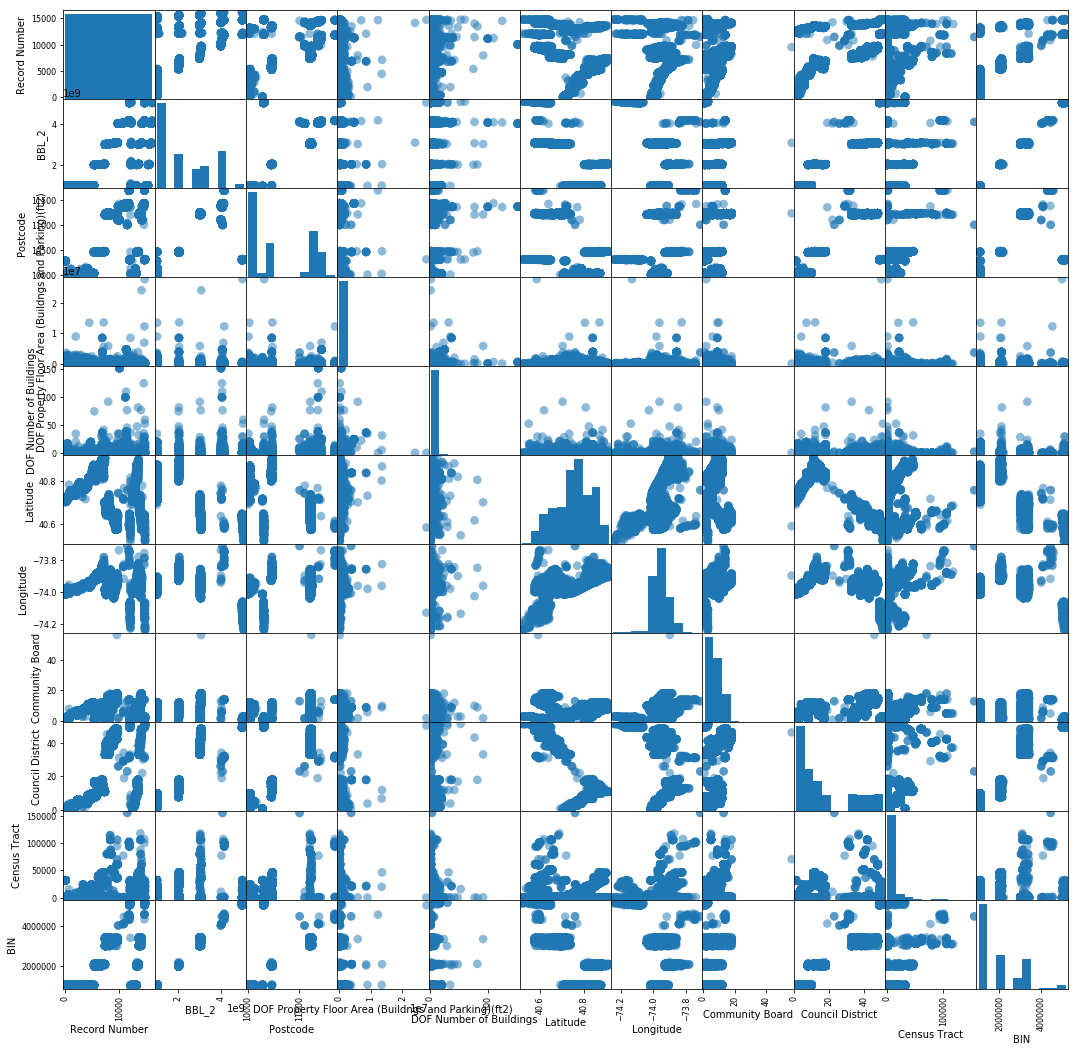

In [7]:
#need to remove columns afterwards ... determine which columns are relevant 

#try make a scatter plot of nrg. Few columns will plot - only those that have numerical values. 
#Pandas will ignore the other ones

#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(18, 18));



In [17]:
nrg.head()

,BBL,Site EUI(kBtu/ft2),Weather Normalized Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,1001007,NaN,Not Available,NaN,Not Available,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,2006460,NaN,Not Available,NaN,Not Available,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
4,2063117,NaN,Not Available,NaN,Not Available,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [8]:
#pandas.to_numeric(arg, errors='raise', downcast=None)

# use pd.to_numeric to convert strings to numeric values,

pd.to_numeric(nrg['Site EUI(kBtu/ft2)'], errors='coerce', downcast=None)

pd.to_numeric(nrg['BBL'], errors='coerce', downcast=None)
pd.to_numeric(nrg['DOF Number of Buildings'], errors='coerce', downcast=None)

pd.to_numeric(nrg['Primary Property Type - Self Selected'], errors='coerce', downcast=None)

pd.to_numeric(nrg['DOF Property Floor Area (Buildngs and Parking)(ft2)'], errors='coerce', downcast=None)

pd.to_numeric(nrg['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce', downcast=None)

pd.to_numeric(nrg['Indirect GHG Emissions(MtCO2e)'], errors='coerce', downcast=None)

pd.to_numeric(nrg['Direct GHG Emissions(MtCO2e)'], errors='coerce', downcast=None)

pd.to_numeric(nrg['Total GHG Emissions(MtCO2e)'], errors='coerce', downcast=None)

pd.to_numeric(nrg['ENERGY STAR Score'], errors='coerce', downcast=None)


pd.to_numeric(nrg['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'], errors='coerce', downcast=None)

pd.to_numeric(nrg['Weather Normalized Source EUI(kBtu/ft2)'], errors='coerce', downcast=None)

pd.to_numeric(nrg['Source EUI(kBtu/ft2)'], errors='coerce', downcast=None)

pd.to_numeric(nrg['Weather Normalized Site EUI(kBtu/ft2)'], errors='coerce', downcast=None)

pd.to_numeric(nrg['Site EUI(kBtu/ft2)'], errors='coerce', downcast=None)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16       125.4
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
16140      NaN
16141      NaN
16142      NaN
16143      NaN
16144      NaN
16145      NaN
16146      NaN
16147      NaN
16148      NaN
16149      NaN
16150      NaN
16151      NaN
16152      NaN
16153      NaN
16154      NaN
16155      NaN
16156      NaN
16157      NaN
16158      NaN
16159      NaN
16160      NaN
16161      NaN
16162      NaN
16163      NaN
16164      NaN
16165      NaN
16166      NaN
16167      NaN
16168      NaN
16169      NaN
Name: Site EUI(kBtu/ft2), Length: 16170, dtype: float64

In [9]:

nrg['Site EUI(kBtu/ft2)'][16]

'125.4'

In [16]:
bsize.BBL.astype(float)

0        1.000010e+09
1        1.000010e+09
2        1.000010e+09
3        1.000010e+09
4        1.000010e+09
5        1.000020e+09
6        1.000020e+09
7        1.000020e+09
8        1.000020e+09
9        1.000030e+09
10       1.000030e+09
11       1.000030e+09
12       1.000030e+09
13       1.000030e+09
14       1.000048e+09
15       1.000050e+09
16       1.000058e+09
17       1.000060e+09
18       1.000070e+09
19       1.000070e+09
20       1.000070e+09
21       1.000070e+09
22       1.000070e+09
23       1.000070e+09
24       1.000070e+09
25       1.000070e+09
26       1.000070e+09
27       1.000078e+09
28       1.000078e+09
29       1.000080e+09
             ...     
42928    1.022480e+09
42929    1.022480e+09
42930    1.022480e+09
42931    1.022480e+09
42932    1.022480e+09
42933    1.022480e+09
42934    1.022480e+09
42935    1.022480e+09
42936    1.022480e+09
42937    1.022480e+09
42938    1.022488e+09
42939    1.022500e+09
42940    1.022500e+09
42941    1.022500e+09
42942    1

In [11]:

# 'SHAPE_Leng' 'SanitDist' 'geometry'] not contained in axis
#bsize.drop(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2', 'AreaSource', 'AssessLand', 'AssessTot', 'BldgArea', 'BldgClass', 'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode', 'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR', 'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand', 'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea', 'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot', 'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F', 'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1', 'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct', 'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area', 'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist', 'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap', 'Tract2010', 'Version', 'XCoord', 'YCoord', 'YearAlter1', 'YearAlter2', 'ZMCode', 'ZipCode', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap', 'geometry'], axis=1, inplace=True)
bsize.drop(['APPBBL', 'APPDate', 'Address', 'AreaSource', 'AssessLand', 'AssessTot', 'BldgArea', 'BldgClass', 'BldgDepth', 'BldgFront', 'Block', 
            'BoroCode', 'Borough', 'BsmtCode',  'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 
            'CommFAR', 'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand', 'ExemptTot', 'Ext', 
            'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea', 'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 
            'Landmark', 'Lot', 'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'NumBldgs', 
            'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1', 'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 
            'PolicePrct', 'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SPDist1', 
            'SPDist2', 'Sanborn', 'SanitBoro',  'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 
            'TaxMap', 'Tract2010', 'Version', 'XCoord', 'YCoord', 'YearAlter1', 'YearAlter2', 'ZMCode', 'ZipCode', 
            'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap'], axis=1, inplace=True)


In [12]:
#nrg.drop(['Record Number', 'BBL_2','Co-reported BBL Status', 'BBLs Co-reported'],axis=1, inplace=True)
nrg.drop([ 'Record Number', 'BBL_2', 'Co-reported BBL Status', 'BBLs Co-reported','Street Number', 
          'Street Name', 'Borough', 'Postcode', 'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
         'DOF Benchmarking Submission Status', 'Automatic Water Benchmarking Eligible', 'Reported Water Method' , 
         'Latitude', 'Longitude', 'Community Board', 'Council District', 'Census Tract', 'BIN', 'NTA'], axis=1, inplace= True)

#nrg.drop(['Reported NYC Building Indentification Numbers (BINs)'], axis=1, inplace= True)


#=====
#Index([u'Record Number', u'BBL_2', u'Co-reported BBL Status',
#       u'BBLs Co-reported',
#       u'BBL',
#       u'Street Number', u'Street Name', u'Borough', u'Postcode',
#       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
#       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
#       u'Weather Normalized Source EUI(kBtu/ft2)',
#       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
#       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
#       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
#       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
#       u'Reported Property Floor Area (Building(s)) (ft²)',
#       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
#       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
#       u'Latitude', u'Longitude', u'Community Board', u'Council District',
#       u'Census Tract', u'BIN', u'NTA'],
#      dtype='object')

In [20]:
pd.to_numeric(nrg['BBL'], errors='coerce', downcast=None)

0        1001007.0
1              NaN
2        2006460.0
3              NaN
4        2063117.0
5        3008876.0
6        3116471.0
7        3173037.0
8              NaN
9        3196035.0
10       3245726.0
11       3337343.0
12             NaN
13       4056316.0
14             NaN
15             NaN
16             NaN
17             NaN
18       1012238.0
19       2019798.0
20       3146368.0
21       4207873.0
22       4220265.0
23             NaN
24             NaN
25       1082894.0
26             NaN
27             NaN
28       1013048.0
29       1035346.0
           ...    
16140          NaN
16141          NaN
16142          NaN
16143          NaN
16144          NaN
16145          NaN
16146          NaN
16147          NaN
16148          NaN
16149          NaN
16150          NaN
16151          NaN
16152          NaN
16153          NaN
16154          NaN
16155          NaN
16156          NaN
16157          NaN
16158          NaN
16159          NaN
16160          NaN
16161       

In [22]:
print (nrg['Site EUI(kBtu/ft2)'].astype(float))
#[...] do this for all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
bsize.BBL.astype(float)

ValueError: could not convert string to float: See Primary BBL

In [23]:
#How many missing values?
indx = np.isnan(nrg['Site EUI(kBtu/ft2)']).sum()
print ("invalid entries changed to NaN %d"%sum(indx))
#do it for however many columns you need

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [15]:
type(nrg['Site EUI(kBtu/ft2)'])

pandas.core.series.Series

In [ ]:
pd.merge(..., right_on=BBL, left_on="NYC Borough, Block, and Lot (BBL)').

In [ ]:
(bsize.BBL.values[0]), (nrg.BBL.values[0])